# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Friday, 9/8/23, 9:00pm

## Overview

### Instructions

-   Problems 1-3 consist of a series of code snippets for you to
    interpret and debug. For Problems 1 and 2, you will be asked to
    identify relevant error(s) and fix the code. For Problem 3, the code
    works as intended; your goal is to identify the code’s purpose by
    following its logic.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [60]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\henry\Downloads\4750\Homework\hw01-henrysigel`


In [61]:
using Plots
using GraphRecipes
using LaTeXStrings

## Problems (Total: 40 Points)

### Problem 1 (8 points)

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [62]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 (3 points)

Describe the logic error.

The logical error is with the if statement. Becuase the initial guess is lower then every value of the array the min_value will never update.

#### Problem 1.2 (3 points)

Write a fixed version of the function.

In [63]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.3 (2 points)

Use your fixed function to find the minimum value of `array_values`.

In [64]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


### Problem 2 (8 points)

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [65]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

average_grade = 94.4


#### Problem 2.1 (3 points)

Describe the logic and/or syntax error.

The is a syntax error. They called a fucntion and by doing that they changed the name of the array. They never actually called the function, and therfore it was not running properly

#### Problem 2.2 (3 points)

Write a fixed version of the code.

In [66]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]

function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end
average_grade = class_average(student_grades)
@show average_grade;

average_grade = 94.4


#### Problem 2.3 (2 points)

Use your fixed code to compute the average grade for the class.

In [67]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]

function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end
class_average(student_grades)
@show average_grade;

average_grade = 94.4


### Problem 3 (8 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [68]:
function mystery_function(values)
    y = []   #Define empty array
    for v in values    #loop of legnth v
        if !(v in y)     # checks if v is in y, if it is not then it exictues the if loop
            append!(y, v)    #add v to y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]   
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


#### Problem 3.1 (4 points)

Explain the purpose of `mystery_function`.

The purpose of this function is to remove duplicate numbers from the array.

#### Problem 3.2 (4 points)

Add comments to the code, explaining why and how it works. Refer to
[“Best Practices for Writing Code
Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
and remember that bad comments can be just as bad as no comments at all.
You do not need to add comments to every line (in fact, this is very bad
practice), but you should note the *purpose* of every “section” of code,
and add comments explaining any code sequences that you don’t
immediately understand.

### Problem 4 (16 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

#### Problem 4.1 (3 points)

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

Notes

100m^3/day waste water produced
1kg/m^3 YUK
20kg/day max level
Method 1
Cost: X^2/20, where X is the amount of water disposed of in m^3/day
Efficiency: 80% effeceint, 20% ends up in steam. 
Which means that if you send all of the water through the land land path. Once you get over about 5.5 it becomes more expensive to do land then chemical 
Method 2
Cost: 1.5 per m^3
Effeciency: e = 1-.005*X, the more you want to do the less efficient it becomes

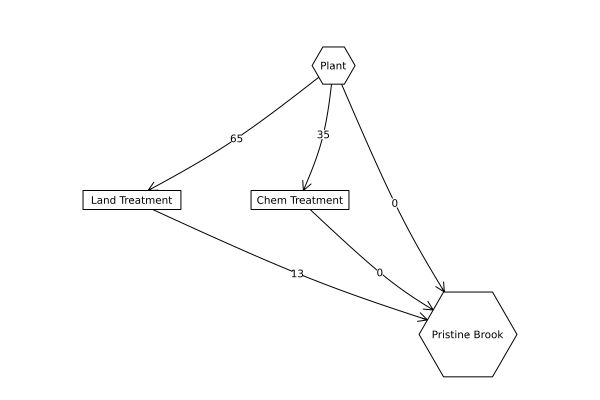

In [69]:
using GraphRecipes, Plots

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => "65", (1,3) => "35", (1, 4) => "0",(2, 4) => "13",(3, 4) => "0")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)

#### Problem 4.2 (4 points)

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

This equation needs to strike a balance between the three, so as one price gets too high the next one goes up and when tat price gets too high, ect


X = Total amount of water per day = $X_1$ + $X_2$

$X_1$ = Method 1 discharge

$X_2$ = Method 2 discharge

$X_3$ = Direct from factory to Brook

$C_1$ = Cost of method 1 = ($X_1$^2)/20

$C_2$ = Cost of method 2 = 1.5*$X_2$

C = Cost total = ($X_1$^2)/20 + 1.5*$X_2$

$E_1$ = Effeciency of method 1 = .8

$E_2$ = Efficiency of method 2 = 1 - .005*$X_2$

Y = amount of YUK per day discharged into Pristine Brook = .2*$X_1$ + $X_2$ * (1-(1 - .005*$X_2$)) + $X_3$

$Y_1$ = $X_1$ * (1-$E_1$)

$Y_2$ = $X_2$ * (1-$E_2$)

Constraints

Y < 20

X = 100





#### Problem 4.3 (4 points)

Implement this systems model as a Julia function which computes the
resulting YUK concentration and cost for a particular treatment plan.
You can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [70]:
function multiple_return_values(x, y)
    return (x+y, x*y)
end

a, b = multiple_return_values(2, 5)
@show a;
@show b;

a = 7
b = 10


In [71]:
function YUK_Concentration(X1, X2, X3)
    if X1 + X2 + X3 == 100  #Check to make sure the inputs are reasonable
    Cost = (X1*X1)/20 + 1.5*X2   #Equation to calculate the cost of the YUK removal
    YUK = .2*X1 + X2 * (1-(1 - .005*X2)) + X3   #YUK removal percentage
    return Cost,YUK
    else 
    end
end


Cost,YUK = YUK_Concentration(65,35,0)
@show Cost;
@show YUK;

Cost = 263.75
YUK = 19.125


Make sure you comment your code appropriately to make it clear what is
going on and why.

#### Problem 4.4 (5 points)

Use your function to experiment with some different combinations of
wastewater discharge and treatment. Can you find one that satisfies the
YUK effluent standard? What was the cost? You don’t have to find an
“optimal” solution to this problem, but what do you think would be
needed to find a better solution?

The solution I found is 65 m^3 per day to Land and 35 m^3 per day to Chemical. This cosr 263.75 dollars, in order to find a better solution you would need to know your goals. This would depend on whether you wanted the cheapest option or the option that reduces the most YUK entering the environment. To find the cheapest you would set the YUK value to 20 and then add chemical treatment until you went over 20.

## References

List any external references consulted, including classmates.